# Recovering the homology of immersed manifolds: demo

Raphaël Tinarrage
<br/>
http://pages.saclay.inria.fr/raphael.tinarrage/

This page describes the implementation and use of the method described in our paper https://arxiv.org/abs/1912.03033

## Background

Let $\mathbb{R}^n$ be the Euclidean space, and $M(\mathbb{R}^n)$ the space of $n \times n$ matrices.
Consider a finite subset $X$ of $\mathbb{R}^n$. The method consists in computing $\check X$, which is a finite subspace of $\mathbb{R}^n \times M(\mathbb{R}^n)$, and in applying DTM-based filtrations in the ambient space $\mathbb{R}^n \times M(\mathbb{R}^n)$. The DTM-filtrations are defined in https://arxiv.org/abs/1811.04757.

This method depends on three parameters: $r \in (0, +\infty)$, $\gamma \in [0, +\infty)$ and $m \in [0,1]$.
The set $\check X$ is defined as
$$\check X = \{ (x, \gamma \overline \Sigma(x)), x \in X  \},$$
where $\overline \Sigma(x)$, the normalized covariance matrix at $x$, is computed with respect to a radius $r$.
We then compute the DTM-filtration over the empirical measure on $\check X$ with parameter $m$.

## Datasets

We consider here two datasets:
-  Bernouilli's lemniscate
-  the Olympic rings

## Functions

<font color='red'>In order to compile this notebook, please compile first the last box of this notebook, which contains the definition of the functions</font>

We need the following functions:
- **NormalizedLocalCovarianceMatrices**:  compute the normalized covariance matrices of a point cloud
- **Augmentation**:                       compute the set $\check X$ associated to $X$

In order to compute DTM-filtrations, we use:
- **DTM**:                    compute the DTM on a point cloud
- **Filtration_value**:       compute the filtration value of an edge in the DTM-filtration
- **WeightedRipsFiltration**: compute the weighted Rips filtration
- **DTMFiltration**:          compute the Rips-DTM-filtration

The two following functions will serve to generate and plot datasets:
- **SampleOnLemniscate**: Sample random points on the lemniscate, with potentially outliers    
- **SampleOnOlympics**: Sample random points on five circles, with potentially outliers  
- **PlotPersistenceBarcodes**: Displays the persistence barcodes of a gd.SimplexTree

We work with the Gudhi library.

## First dataset

We start with a sample $X$ of the lemniscate $\mathcal{M} \subset \mathbb{R}^2$. 
It is to be seen as an immersion of the circle $\mathbb{S}_1 \rightarrow \mathbb{R}^2$.

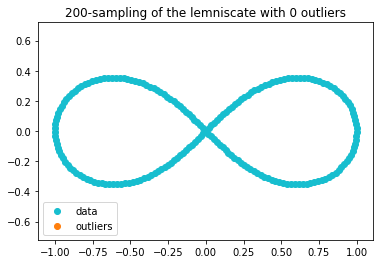

In [2]:
' Sampling on the lemniscate '
N_obs = 200                                         # number of points sampled on the lemniscate
N_out = 0                                           # number of outliers 
X = SampleOnLemniscate(N_obs, N_out, is_plot=True)  # sample points 

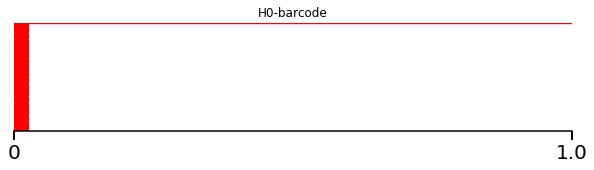

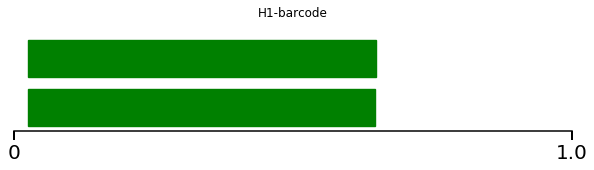

In [3]:
' Usual Rips complex on X '
st_rips = gudhi.RipsComplex(points = X, max_edge_length = 1).create_simplex_tree(max_dimension=2) 
                                                   # create a Rips complex     

PlotPersistenceBarcodes(st_rips, tmax=1, d=3)      # compute the persistence

On these diagrams, one can read the homology of the lemniscate. Its Betti numbers are $(\beta_0, \beta_1) = (1,2)$.

We now illustrate our method. We aim to recover the homology of the original circle $\mathbb{S}_1$.
First, we compute the set $\check X$, with given parameters $r$ and $\gamma$. 

In [4]:
' Computing X_check '
r = 0.05
gamma = 3
X_check = Augmentation(X, r, gamma)

We then compute the persistence diagram of the DTM-filtration on $\check X$ with parameter $m = 0.03$.

Weighted Rips Complex is of dimension 2 - 1333500 simplices - 200 vertices. Filtration maximal value is inf.


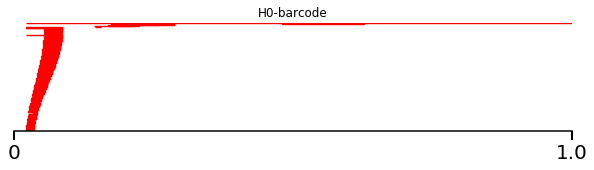

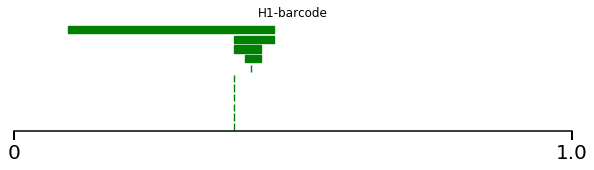

In [5]:
' DTM-filtration on X_check '
m = 0.01
p = 1                                            
dimension_max = 2

st = DTMFiltration(X_check, m, p, dimension_max)         # create a DTM-filtration
PlotPersistenceBarcodes(st, tmax=1, d=3)                 # compute the persistence

On these diagrams, there is an interval where one reads the homology of the original manifold $\mathbb{S}_1$: $(\beta_0, \beta_1) = (1,1)$.
We successfully recovered the homology of the original manifold.

As illustrated by the following example, this construction is stable in Wasserstein distance: adding a few outliers in the dataset results in a small change (in bottleneck distance) in the persistence barcodes.

Weighted Rips Complex is of dimension 2 - 2604375 simplices - 250 vertices. Filtration maximal value is inf.


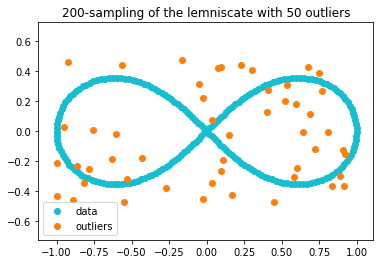

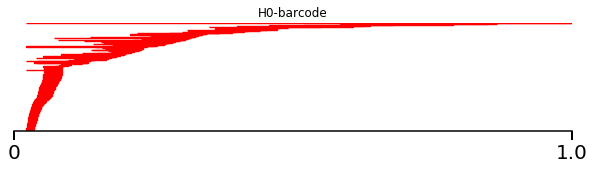

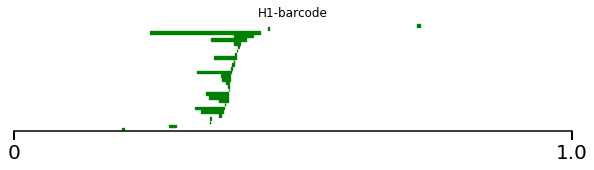

In [6]:
' Sampling on the lemniscate with outliers '
N_obs = 200                                            # number of points sampled on the lemniscate
N_out = 50                                             # number of outliers 
X = SampleOnLemniscate(N_obs, N_out, is_plot=True)     # sample points 

' Computing X_check '
r=0.05
gamma = 3
X_check = Augmentation(X, r, gamma)

' DTM-filtration on X_check '
m = 0.01
p = 1                                            
dimension_max = 2

st = DTMFiltration(X_check, m, p, dimension_max)      # create a DTM-filtration
PlotPersistenceBarcodes(st, tmax=1, d=3)              # compute the persistence

## Second dataset

We consider a sample $X$ of the Olympic rings $\mathcal{M} \subset \mathbb{R}^2$. 
It is to be seen as an immersion of the disjoint union of five circles $\cup_{i=1}^5 \mathbb{S}_1 \rightarrow \mathbb{R}^2$.

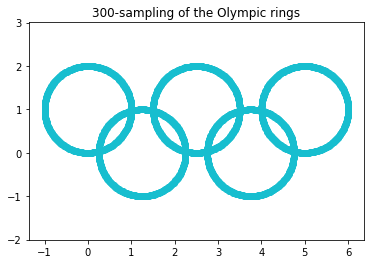

In [7]:
' Sampling on the Olympic rings '
N_obs = 300                                 # number of points sampled on each Olympic rings
X = SampleOnOlympics(N_obs, is_plot=True)   # sample points 

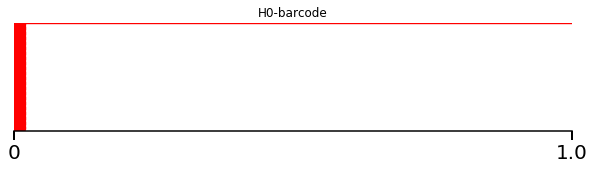

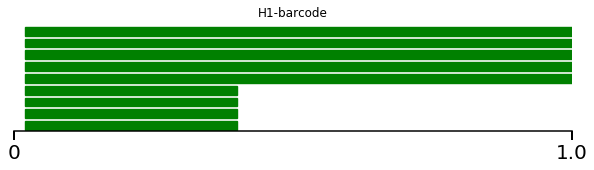

In [8]:
' Usual Rips complex on X '
max_edge_length = 1                               # maximal edge length in the Rips complex

st_rips = gudhi.RipsComplex(points = X, max_edge_length = max_edge_length).create_simplex_tree(max_dimension=2) 
                                                  # create a Rips complex     
PlotPersistenceBarcodes(st_rips, tmax=1, d=3)     # compute the persistence

On these diagrams, one can read the following Betti numers: $(\beta_0, \beta_1) = (1,9)$.

We now illustrate our method. Our goal is to recover the homology of five (disconnected) circles.
First, we compute the set $\check X$, with given parameters $r$ and $\gamma$. 

In [9]:
' Computing X_check '
r = 0.03
gamma = 1
X_check = Augmentation(X, r, gamma)

We then compute the persistence diagram of the DTM-filtration on $\check X$ with parameter $m = 0.01$.
Only bars of length larger than $0.1$ are displayed.

Weighted Rips Complex is of dimension 2 - 42198147 simplices - 1500 vertices. Filtration maximal value is 1.


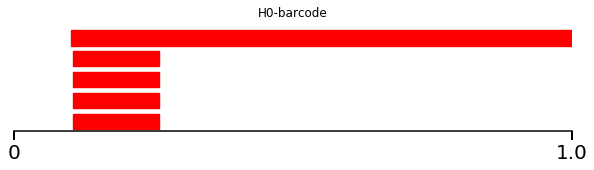

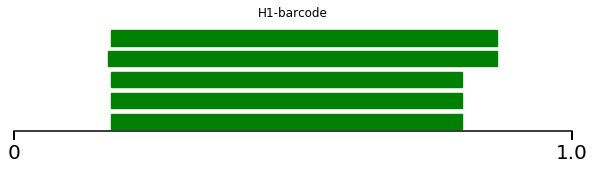

In [11]:
' DTM-filtration on X_check '
m = 0.01
p = 1                                            
dimension_max = 2
filtration_max = 1                                       # maximal filtration value

st = DTMFiltration(X_check, m, p, dimension_max, filtration_max)         
                                                         # create a DTM-filtration
PlotPersistenceBarcodes(st, tmax=1, d=3, eps = 0.1)      # compute the persistence

On these diagrams, there is an interval where one reads the Betti numbers of the original manifold $\cup_{i=1}^5 \mathbb{S}_1$, that is, $(\beta_0, \beta_1) = (5,5)$.

# Take-home message

This implementation depends on 3 parameters:
- $r$: scale to compute covariance matrices 
- $\gamma$: dilatation of the space $M(\mathbb{R}^n) \subset \mathbb{R}^n \times M(\mathbb{R}^n)$
- $m$: parameter of the DTM

It can be used as follows:
``` 
# X is a Nxn array, N = number of points, n = dimension of the ambient space
r = 0.05
gamma = 1
m = 0.01

p = 1                                            
dimension_max = 2     
filtration_max = 1

X_check = Augmentation(X, r, gamma)
st = DTMFiltration(X_check, m, p, dimension_max, filtration_max) 
PlotPersistenceBarcodes(st, tmax=1, d=dimension_max+1) 
```

## Functions

In [1]:
import gudhi
import math 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KDTree
from scipy import spatial

COLORS = ['red', 'green', 'blue', 'orange'] # Colors of the persistence barcodes

def NormalizedLocalCovarianceMatrices(X, r):
    '''
    Compute the normalized covariance matrices at scale r of the measure \mu, where \mu is the empirical measure
    on the set X. 
    
    Input:
    X: a Nxn numpy array representing N points in R^n
    r: a positive parameter
    
    Output: 
    NormLocCovMat: a Nx(n^2) numpy array contaning the normalized covariance matrices 
    on the points X
    '''
    N = np.shape(X)[0]
    n = np.shape(X)[1]
    tree = spatial.KDTree(X)
    LocCovMat = np.zeros((n,n,N))
    NormLocCovMat = np.zeros((n,n,N))

    for i in range(N):
        x = X[i, :]
        ind = tree.query_ball_point(x, r)
        k = len(ind)    
        M = 0
        for j in range(k):
            z = X[i, :] - X[ind[j], :]
            M = M + np.outer(z,z)
        M = M/k
        LocCovMat[:,:,i] = M

    NormLocCovMat = LocCovMat/r**2
    return NormLocCovMat

def Augmentation(X, r, gamma):
    '''
    Compute the set \check X associated to X. 
    
    Input:
    X: a Nxn numpy array representing N points in R^n
    r: a positive parameter
    gamma: a non-negative parameter
    
    Output: 
    X_check: a Nx(n+n^2) numpy array representing N points in R^(n+n^2)
    '''
    N = np.shape(X)[0]
    n = np.shape(X)[1]
    
    NormLocCovMat = NormalizedLocalCovarianceMatrices(X,r)
    X_check = np.zeros((N, n+n**2))

    for i in range(N):
        X_check[i, 0:n] = X[i,:]
        X_check[i, n:(n+n**2)] = gamma*np.matrix.flatten(NormLocCovMat[:,:,i])
    return X_check

def DTM(X,query_pts,m):
    '''
    Compute the values of the DTM (with exponent p=2) of the empirical measure of a point cloud X
    Require sklearn.neighbors.KDTree to search nearest neighbors
    
    Input:
    X: a nxd numpy array representing n points in R^d
    query_pts:  a kxd numpy array of query points
    m: parameter of the DTM in [0,1)
    
    Output: 
    DTM_result: a kx1 numpy array contaning the DTM of the 
    query points
    
    Example:
    X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
    Q = np.array([[0,0],[5,5]])
    DTM_values = DTM(X, Q, 0.3)
    '''
    N_tot = X.shape[0]     
    k = math.floor(m*N_tot)+1   # number of neighbors

    kdt = KDTree(X, leaf_size=30, metric='euclidean')
    NN_Dist, NN = kdt.query(query_pts, k, return_distance=True)  

    DTM_result = np.sqrt(np.sum(NN_Dist*NN_Dist,axis=1) / k)
    
    return(DTM_result)

def Filtration_value(p, fx, fy, d, n = 10):
    '''
    Compute the filtrations values of the edge [x,y] in the weighted Rips filtration
    If p is not 1, 2 or 'np.inf, an implicit equation is solved
    The equation to solve is G(I) = d, where G(I) = (I**p-fx**p)**(1/p)+(I**p-fy**p)**(1/p)
    We use a dichotomic method
    
    Input:
    p: parameter of the weighted Rips filtration, in [1, +inf) or np.inf
    fx: filtration value of the point x
    fy: filtration value of the point y
    d: distance between the points x and y
    n: number of iterations of the dichotomic method
        
    Output: 
    val : filtration value of the edge [x,y], i.e. solution of G(I) = d    
    
    Example:
    Filtration_value(2.4, 2, 3, 5, 10)
    '''
    if p==np.inf:
        value = max([fx,fy,d/2])
    else:
        fmax = max([fx,fy])
        if d < (abs(fx**p-fy**p))**(1/p):
            value = fmax
        elif p==1:
            value = (fx+fy+d)/2
        elif p==2:
            value = np.sqrt( ( (fx+fy)**2 +d**2 )*( (fx-fy)**2 +d**2 ) )/(2*d)            
        else:
            Imin = fmax; Imax = (d**p+fmax**p)**(1/p)
            for i in range(n):
                I = (Imin+Imax)/2
                g = (I**p-fx**p)**(1/p)+(I**p-fy**p)**(1/p)
                if g<d:
                    Imin=I
                else:
                    Imax=I
            value = I
    return value

def WeightedRipsFiltration(X, F, p, dimension_max =2, filtration_max = np.inf):
    '''
    Compute the weighted Rips filtration of a point cloud, weighted with the 
    values F, and with parameter p
    
    Input:
    X: a nxd numpy array representing n points in R^d
    F: an array of length n,  representing the values of a function on X
    p: a parameter in [0, +inf) or np.inf
    filtration_max: maximal filtration value of simplices when building the complex
    dimension_max: maximal dimension to expand the complex
    
    Output:
    st: a gudhi.SimplexTree 
    '''
    N_tot = X.shape[0]     
    distances = euclidean_distances(X)          # compute the pairwise distances
    st = gudhi.SimplexTree()                    # create an empty simplex tree

    for i in range(N_tot):                      # add vertices to the simplex tree
        value = F[i]
        if value<filtration_max:
            st.insert([i], filtration = F[i])            
    for i in range(N_tot):                      # add edges to the simplex tree
        for j in range(i):
            value = Filtration_value(p, F[i], F[j], distances[i][j])
            if value<filtration_max:
                st.insert([i,j], filtration  = value)
    
    st.expansion(dimension_max)                 # expand the simplex tree
 
    result_str = 'Weighted Rips Complex is of dimension ' + repr(st.dimension()) + ' - ' + \
        repr(st.num_simplices()) + ' simplices - ' + \
        repr(st.num_vertices()) + ' vertices.' +\
        ' Filtration maximal value is ' + str(filtration_max) + '.'
    print(result_str)

    return st

def DTMFiltration(X, m, p, dimension_max =2, filtration_max = np.inf):
    '''
    Compute the DTM-filtration of a point cloud, with parameters m and p
    
    Input:
    X: a nxd numpy array representing n points in R^d
    m: parameter of the DTM, in [0,1) 
    p: parameter of the filtration, in [0, +inf) or np.inf
    filtration_max: maximal filtration value of simplices when building the complex
    dimension_max: maximal dimension to expand the complex
    
    Output:
    st: a gudhi.SimplexTree 
    '''
    DTM_values = DTM(X,X,m)
    st = WeightedRipsFiltration(X, DTM_values, p, dimension_max, filtration_max)

    return st

def SampleOnLemniscate(N_obs = 100, N_out = 50, is_plot = False):
    '''
    Sample evenly spaced points on Bernouilli's lemniscate,
    with outliers
    
    Input:
    N_obs: an integer, number of points on the Lemniscate
    N_out: an integer, number on points randomly drawn in [-1,1]x[-0.5,0.5]
    
    Output:
    data: a nx2 array, representing points in R^2
    
    '''
    I = np.linspace(0, 2*np.pi, N_obs+1)
    I = I[0:-1]
    pas = 2*np.pi/N_obs
    
    a = np.sin(I)
    b = np.cos(I)*np.sin(I)
    c = (1+np.cos(I)**2)
    ap = np.cos(I)
    bp = np.cos(I)**2-np.sin(I)**2
    cp = -2*np.cos(I)*np.sin(I)
    Xp = (a*cp-ap*c)/(c**2)
    Yp = (b*cp-bp*c)/(c**2)
    
    g = np.sqrt(  ( Xp )**2 + ( Yp )**2)
    C=np.cumsum(g)
    G = np.concatenate(([0], C[0:-1]))*pas
    alpha = G[-1]
    II = np.linspace(0, alpha, N_obs)
    Ginv = np.interp(II, G, I)
    
    X_obs=np.sin(Ginv)/(1+np.cos(Ginv)**2)
    Y_obs=np.cos(Ginv)*np.sin(Ginv)/(1+np.cos(Ginv)**2)

    X_out = np.random.rand(N_out)*2-1
    Y_out = np.random.rand(N_out)-0.5

    X = np.concatenate((X_obs, X_out))
    Y = np.concatenate((Y_obs, Y_out))
    data = np.stack((X,Y)).transpose() 
    
    if is_plot:
        fig, ax = plt.subplots()
        plt_obs = ax.scatter(X_obs, Y_obs, c='tab:cyan');
        plt_out = ax.scatter(X_out, Y_out, c='tab:orange');
        ax.axis('equal')
        ax.set_title(str(N_obs)+'-sampling of the lemniscate with '+str(N_out)+' outliers')
        ax.legend((plt_obs, plt_out), ('data', 'outliers'), loc='lower left')
    
    return data

def SampleOnOlympics(N_obs = 50, is_plot = False):
    '''
    Sample 5*N_obs points (observations) points from the uniform distribution on five unit circle in R^2 
        
    Input: 
    N_obs: number of sample points on the circles
    is_plot = True or False: draw a plot of the sampled points            
    
    Output : 
    data : a (5*N_obs)x2 matrix, the sampled points concatenated 
    '''
    l=1.25
    center1 = np.array([0,1])
    center2 = np.array([1*l,0])
    center3 = np.array([2*l,1])
    center4 = np.array([3*l,0])
    center5 = np.array([4*l,1])
    I = np.linspace(0, 2*np.pi, N_obs) 
     
    circle =np.stack((np.cos(I),np.sin(I))).transpose()
    X1 = circle+center1    
    X2 = circle+center2    
    X3 = circle+center3    
    X4 = circle+center4    
    X5 = circle+center5    

    data = np.concatenate((X1, X2, X3, X4, X5))
        
    if is_plot:
        fig, ax = plt.subplots()
        plt_obs = ax.scatter(data[:,0], data[:,1], c='tab:cyan');
        ax.axis('equal')
        ax.set_title(str(N_obs)+'-sampling of the Olympic rings')

    return data

def PlotPersistenceBarcodes(st, tmax = 1, d=2, eps = 0, hide_small_infinite_bars = False, 
                            barcode_index = [],
                            homology_coeff_field = 2, xtick = 0, xticks = []):
    '''
    Display persistence barcodes of the filtration given by st
    
    Input:
    st: a gudhi.SimplexTree
    tmax: maximal filtration value to plot the barcodes
    d: maximal dimension to compute the persistence
    eps: minimal length of displayed bars
    hide_small_infinite_bars: if False, do not display bars of length < epsilon which exceed the maximal filtration value
    barcode_index: array containing the dimensions to plot the barcodes. By default: range(d+1)
    xticks: a list of xticks 
    homology_coeff_field: Field of coefficients to compute the persistence
    xtick: if nonzero, add a xtick to the barcodes
    xticks: a list of x ticks. If nonempty, replace the default ticks by this list
    '''
    st.persistence(homology_coeff_field = homology_coeff_field)    #compute the persistence

    ' Plot the persistence barcodes '
    width = 0.75       # width of the bars
    eps1 = .1          # y margin
    eps2 = .0          # x margin
    labelsize = 12     # size of x ticks
    
    if not barcode_index: 
        barcode_index = range(d+1)
    for i in barcode_index:
        diagram = st.persistence_intervals_in_dimension(i)
        if hide_small_infinite_bars:
            diagram = [t for t in diagram if min(t[1], tmax)-t[0] > eps]          #select large enough bars
            diagram = [[t[0], min(t[1], tmax)] for t in diagram]                  #threshold the bars exceeding tmax
        else:
            diagram = [t for t in diagram if t[1]-t[0] > eps]                     #select large enough bars
            diagram = [[t[0], min(t[1], tmax)] for t in diagram]                  #threshold the bars exceeding tmax
        if diagram:
            color = COLORS[i]
            fig = plt.figure( figsize=(10,2) )
            ax = plt.axes(frameon=True)    
            for j in range(len(diagram)):
                t = diagram[j]
                plt.fill([t[0], t[1], t[1], t[0]], [j, j, j+width, j+width], fill=True, c=color, lw = 1.4)

            ax.set_xlim(-eps2, tmax+eps2)
            ax.spines['bottom'].set_visible(True)
            ax.spines['bottom'].set_bounds(0, tmax)
            ax.spines['bottom'].set_linewidth(1.5)  
            if xticks:
                plt.xticks(xticks)
            else:
                if xtick:  
                    plt.xticks([0, xtick, tmax])
                    ax.set_xticklabels([str(0), '%.1f' %xtick, '%.1f' %tmax])
                else:      
                    plt.xticks([0, tmax])
                    ax.set_xticklabels([str(0), '%.1f' %tmax])
            ax.tick_params(axis='both', which='major', labelsize=20, size = 9, width = 2) 
            ax.axes.get_yaxis().set_visible(False)
            ax.set_ylim(-eps1, len(diagram) + eps1)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)     
            plt.title('H'+str(i)+'-barcode')